# DTSA 5509 Final Project

## GitHub repo URL
https://github.com/k-khuu/DTSA-5509-Final-Project

## Introduction and Problem Description

This project focuses on predicting customer churn using a dataset from a telecom company based in California, available on Kaggle. The dataset includes detailed information about customer tenure, service usage, geographic location, churn status, and reported reasons for leaving. 

The goal is to develop supervised learning models that can accurately identify customers at risk of churning. 

Key challenges involve ensuring data quality, avoiding data leakage, and selecting or engineering features that have the strongest predictive power. Effective churn prediction enables the company to implement proactive retention strategies and allocate resources more efficiently.


In [37]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Exploratory Data Analysis

Kaggle link: https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset

A telco company that provided home phone and Internet services to 7043 customers in California in Q3.

### Data Description

7043 observations with 33 variables

**CustomerID**: A unique ID that identifies each customer.  
**Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.  
**Country**: The country of the customer’s primary residence.  
**State**: The state of the customer’s primary residence.  
**City**: The city of the customer’s primary residence.  
**Zip Code**: The zip code of the customer’s primary residence.  
**Lat Long**: The combined latitude and longitude of the customer’s primary residence.  
**Latitude**: The latitude of the customer’s primary residence.  
**Longitude**: The longitude of the customer’s primary residence.  
**Gender**: The customer’s gender: Male, Female  
**Senior Citizen**: Indicates if the customer is 65 or older: Yes, No  
**Partner**: Indicates if the customer has a partner: Yes, No  
**Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.  
**Tenure Months**: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.  
**Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No  
**Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No  
**Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.  
**Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No  
**Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No  
**Device Protection**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No  
**Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No  
**Streaming TV**: Indicates if the customer uses their Internet service to stream television programming from a third party provider: Yes, No. The company does not charge an additional fee for this service.  
**Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.  
**Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.  
**Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No  
**Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check  
**Monthly Charge**: Indicates the customer’s current total monthly charge for all their services from the company.  
**Total Charges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.  
**Churn Label**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.  
**Churn Value**: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.  
**Churn Score**: A value from 0–100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.  
**CLTV**: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.  
**Churn Reason**: A customer’s specific reason for leaving the company. Directly related to Churn Category.

### Load Data and Analyzing the Dataset

In [6]:
# Load the Telco customer churn dataset from an Excel file into a pandas DataFrame

df = pd.read_excel('/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx')

In [7]:
# Show basic info about each column in the DataFrame

def data_info(data: pd.DataFrame) -> pd.DataFrame:
    return pd.DataFrame({
        "Column": data.columns,
        "Data Type": data.dtypes.values,
        "Unique Values Count": data.nunique().values,
        "Unique Values": [data[col].unique() for col in data.columns],
        "Null Count": data.isna().sum().values
    })

data_info(df)

,Column,Data Type,Unique Values Count,Unique Values,Null Count
0,CustomerID,object,7043,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",0
1,Count,int64,1,[1],0
2,Country,object,1,[United States],0
3,State,object,1,[California],0
4,City,object,1129,"[Los Angeles, Beverly Hills, Huntington Park, ...",0
5,Zip Code,int64,1652,"[90003, 90005, 90006, 90010, 90015, 90020, 900...",0
6,Lat Long,object,1652,"[33.964131, -118.272783, 34.059281, -118.30742...",0
7,Latitude,float64,1652,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",0
8,Longitude,float64,1651,"[-118.272783, -118.30742, -118.293953, -118.31...",0
9,Gender,object,2,"[Male, Female]",0


### Initial Observations

Geographic Scope  
- Location fields (zip code, latitude, longitude) show minimal variation, confirming the dataset is limited to a specific region in California.

Missing Data  
- One column contains missing values, likely tied to a feature that only applies to a subset of users. This is expected for optional services.

Distribution Patterns  
- Churn Rate: Roughly 26.5% of customers have discontinued service.  
- Monthly Charges: A dense cluster around 20 dollars, with churn-free customers predominantly associated with this range. The rest follows a bell-shaped curve peaking near 80 dollars.  
- Tenure: Skewed toward newer customers, with a long tail of long-term users—suggesting a Zipf-like distribution.

Categorical Feature Breakdown  
- Gender: Evenly split across male and female customers.  
- Services: Includes phone, internet, entertainment, and service quality indicators.  
- Churn Drivers: Common reasons include poor support, competitive alternatives, and dissatisfaction with offerings.

Correlation Highlights  
- Churn vs. Churn Score: Weak correlation (~16%), useful as a baseline but not strongly predictive.  
- Tenure vs. Monthly Charges: Slight negative correlation longer-tenured users tend to pay marginally less.  
- Spending Over Time: Customers tend to adopt higher-priced plans or add-ons as tenure increases.

Working Hypotheses  
- City-Level Churn Variation: Coverage issues in certain cities may contribute to elevated churn. Latitude and longitude can improve spatial granularity.  
- Payment Method Impact: Electronic check users show a churn rate near 50%, significantly higher than other methods. Remaining payment types exhibit relatively uniform churn behavior.


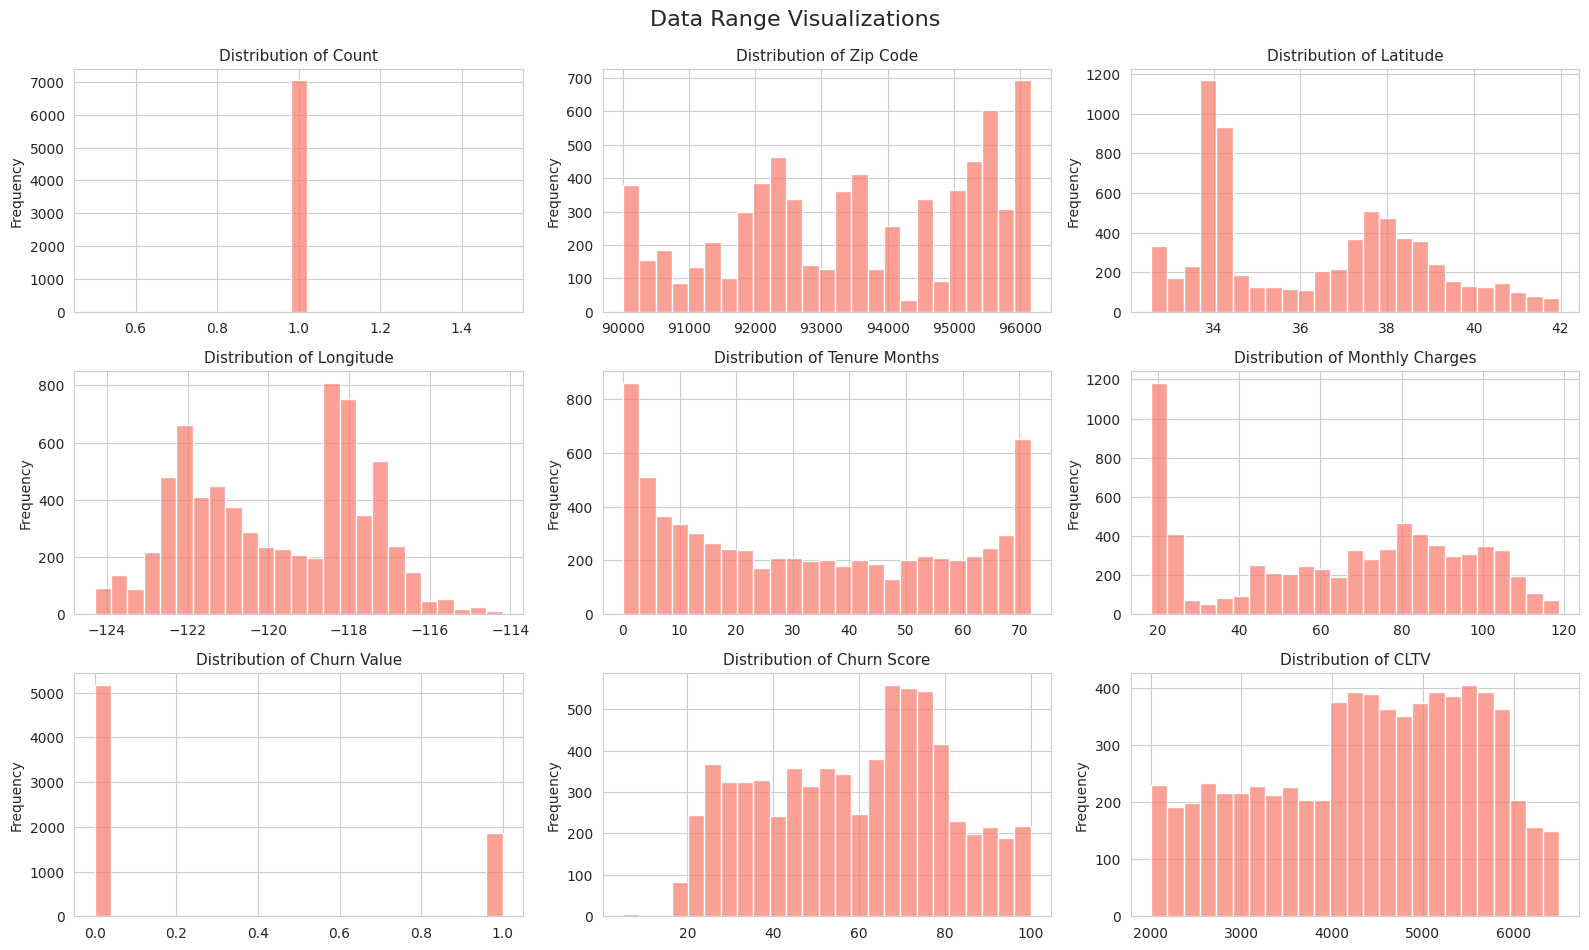

In [9]:
# Data Range Visualizations
numeric_features = df.select_dtypes(include=['number']).columns.tolist()

# Set up custom plot style
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))

# Plot each histogram in a grid
for idx, col in enumerate(numeric_features, 1):
    plt.subplot(len(numeric_features) // 3 + 1, 3, idx)
    sns.histplot(data=df, x=col, bins=25, kde=False, color='salmon', edgecolor='white')
    plt.title(f'Distribution of {col}', fontsize=11)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Data Range Visualizations', fontsize=16, y=1.02)
plt.show()

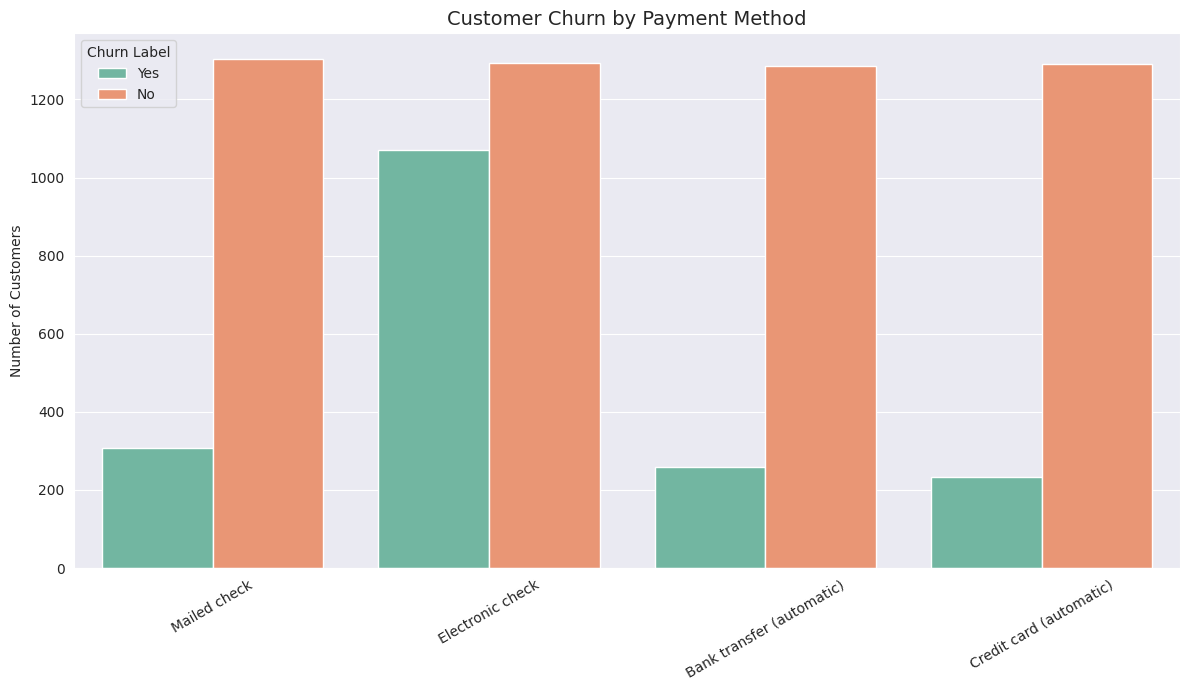

In [12]:
# Compare churn distribution across payment methods

plt.figure(figsize=(12, 7))
sns.set_style("darkgrid")
sns.countplot(data=df, x='Payment Method', hue='Churn Label', palette='Set2')

plt.title('Customer Churn by Payment Method', fontsize=14)
plt.xlabel('')
plt.ylabel('Number of Customers')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

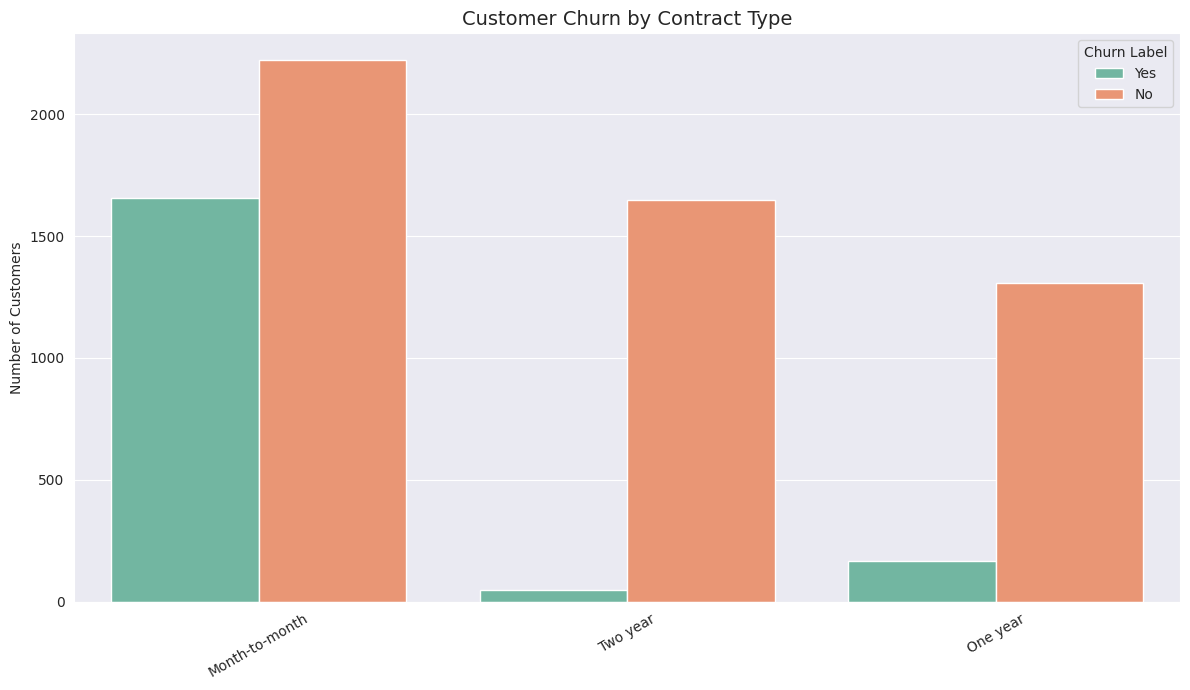

In [13]:
# Analyze churn distribution across contract types

plt.figure(figsize=(12, 7))
sns.set_style("darkgrid")
sns.countplot(data=df, x='Contract', hue='Churn Label', palette='Set2')

plt.title('Customer Churn by Contract Type', fontsize=14)
plt.xlabel('')
plt.ylabel('Number of Customers')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### Data Enrichment for Modeling
To prepare the dataset for effective machine learning, the following structured steps are applied:

Phase 1: Initial Refinement
- Strip out metadata and location-based fields that do not contribute to predictive performance.
- Ensure numerical consistency by converting Total Charges to a float type and resolving null entries via mean imputation.
  
Phase 2: Feature Structuring
- Translate categorical fields such as Contract into numerical form using label encoding to facilitate algorithm compatibility.
- Introduce NumServices, a synthesized metric capturing the total number of subscribed services per customer.
  
Phase 3: Model Preparation
- Partition the dataset into training and test subsets to support generalization and performance benchmarking.
- Apply standard scaling to normalize feature distributions, improving convergence behavior across most learning algorithms.


In [15]:
# Drop columns that are either identifiers, location metadata, or direct leakage sources
excluded_fields = [
    'CustomerID', 'Churn Label', 'Count', 'Country', 'State',
    'Zip Code', 'Lat Long', 'City', 'Churn Reason'
]
df_reduced = df.drop(columns=[col for col in excluded_fields if col in df.columns])

# Encode contract type into numerical format for model compatibility
label_encoder = LabelEncoder()
df_reduced['Contract'] = label_encoder.fit_transform(df_reduced['Contract'])

# Convert Total Charges to float and handle non-numeric entries by imputing with the mean
df_reduced['Total Charges'] = pd.to_numeric(df_reduced['Total Charges'], errors='coerce')
df_reduced['Total Charges'].fillna(df_reduced['Total Charges'].mean(), inplace=True)

# Create a composite feature representing the number of active services per customer
active_services = [
    'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies'
]
df_reduced['NumServices'] = df_reduced[active_services].apply(lambda x: (x == "Yes").sum(), axis=1)

# One-hot encode remaining categorical variables to prepare for model ingestion
df_reduced = pd.get_dummies(df_reduced, drop_first=True)

df_reduced.head()

,Latitude,Longitude,Tenure Months,Contract,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,NumServices,...,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,33.964131,-118.272783,2,0,53.85,108.15,1,86,3239,3,...,False,False,False,False,False,False,True,False,False,True
1,34.059281,-118.307420,2,0,70.70,151.65,1,67,2701,1,...,False,False,False,False,False,False,True,False,True,False
2,34.048013,-118.293953,8,0,99.65,820.50,1,86,5372,5,...,False,False,False,True,False,True,True,False,True,False
3,34.062125,-118.315709,28,0,104.80,3046.05,1,84,5003,6,...,False,True,False,True,False,True,True,False,True,False
4,34.039224,-118.266293,49,0,103.70,5036.30,1,89,5340,6,...,False,False,False,True,False,True,True,False,False,False


In [16]:
# Separate features and target, then partition into training and test sets
X = df_reduced.drop(columns=["Churn Value"]).values
y = df_reduced["Churn Value"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Apply scaling to training and test data independently to avoid data leakage
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Analysis (Model Building and Training)

Three classification models were developed to assess predictive performance: **Logistic Regression** as a baseline, along with **Random Forest** and **XGBoost** to explore ensemble and boosting methods. Each model was evaluated using precision, recall, F1-score, and ROC AUC to provide a comprehensive view of effectiveness.

Logistic Regression offered a straightforward benchmark with interpretable results but limited predictive power. Random Forest improved accuracy through ensemble learning, while XGBoost delivered the strongest overall performance. It achieved the highest ROC AUC and maintained a strong balance between precision and recall.

In churn prediction, recall is especially important. Capturing a larger share of actual churners enables more effective retention strategies and reduces customer loss. Model selection prioritized not only accuracy but also the ability to identify at-risk customers with consistency.

### Logistic Regression Model

In [20]:
# Initialize and train Logistic Regression model
logreg_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
logreg_model.fit(X_train, y_train)

# Generate predictions and probabilities
logreg_preds = logreg_model.predict(X_test)
logreg_probs = logreg_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Logistic Regression Performance")
print("-" * 40)
print("Classification Report:\n", classification_report(y_test, logreg_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, logreg_preds))
print("ROC AUC Score:", roc_auc_score(y_test, logreg_probs))
print("=" * 60)

Logistic Regression Performance
----------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      1036
           1       0.76      0.92      0.83       373

    accuracy                           0.90      1409
   macro avg       0.86      0.91      0.88      1409
weighted avg       0.91      0.90      0.90      1409

Confusion Matrix:
 [[926 110]
 [ 29 344]]
ROC AUC Score: 0.970731934538905


### Random Forest

In [22]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)

# Generate predictions and probabilities
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Random Forest Performance")
print("-" * 40)
print("Classification Report:\n", classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("ROC AUC Score:", roc_auc_score(y_test, rf_probs))
print("=" * 60)

Random Forest Performance
----------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      1036
           1       0.85      0.84      0.84       373

    accuracy                           0.92      1409
   macro avg       0.89      0.89      0.89      1409
weighted avg       0.92      0.92      0.92      1409

Confusion Matrix:
 [[980  56]
 [ 61 312]]
ROC AUC Score: 0.9711201051683624


### XGBoost

In [23]:
# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Generate predictions and probabilities
xgb_preds = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("XGBoost Performance")
print("-" * 40)
print("Classification Report:\n", classification_report(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_probs))
print("=" * 60)

XGBoost Performance
----------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1036
           1       0.84      0.86      0.85       373

    accuracy                           0.92      1409
   macro avg       0.89      0.90      0.90      1409
weighted avg       0.92      0.92      0.92      1409

Confusion Matrix:
 [[976  60]
 [ 54 319]]
ROC AUC Score: 0.9774188205823595


### Model-Based Feature Interpretation

- Feature importance was assessed using Random Forest and XGBoost to identify key drivers of model predictions.
- Logistic Regression coefficients were visualized to enhance interpretability and provide a linear perspective on feature influence


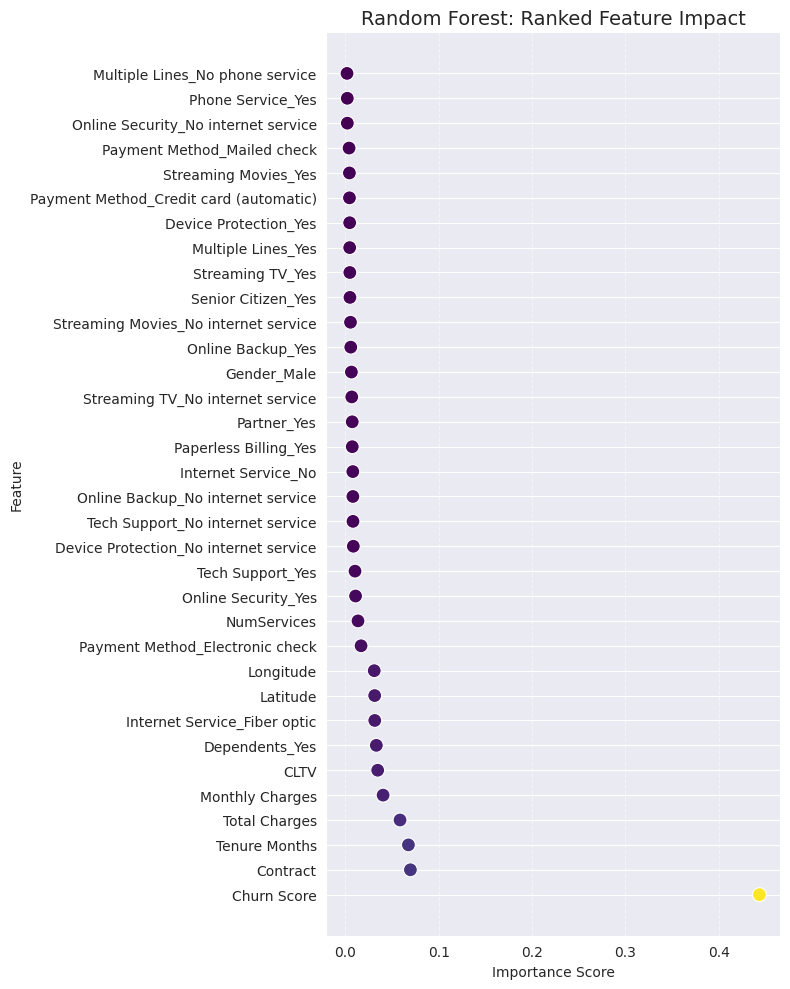

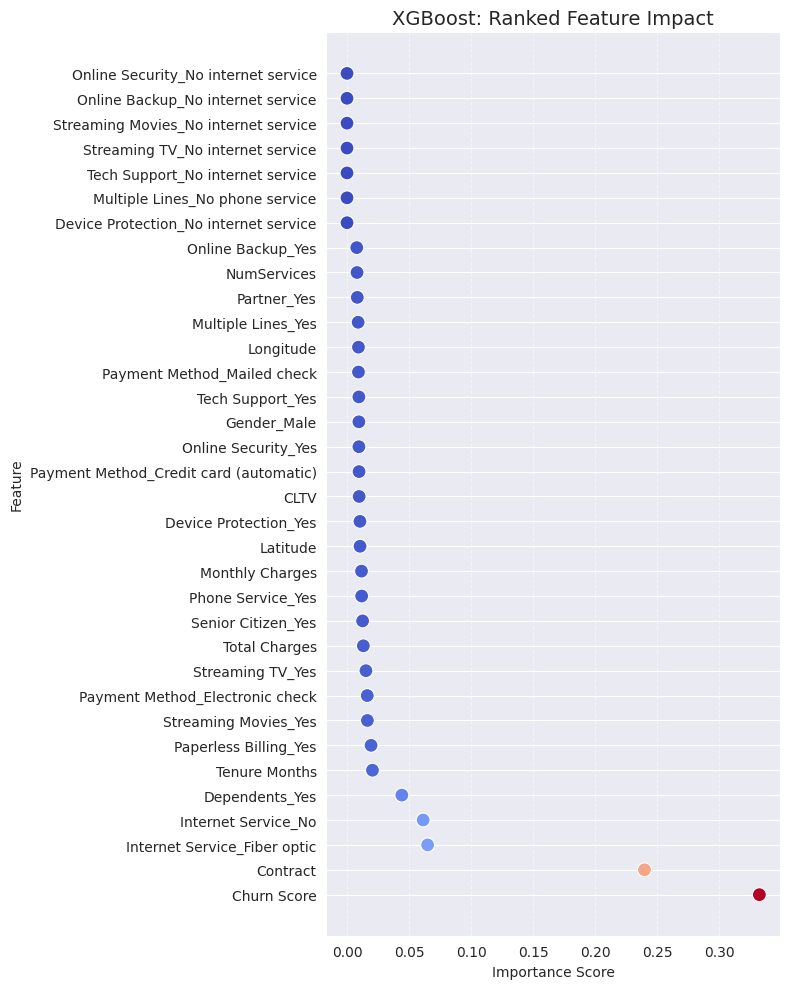

In [31]:
# Reconstruct training features for visualization
X_train_df = pd.DataFrame(X_train, columns=df_reduced.drop(columns=["Churn Value"]).columns)

# Random Forest Feature Importance
rf_importances = rf_model.feature_importances_
rf_importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 10))
sns.scatterplot(
    x='Importance',
    y='Feature',
    data=rf_importance_df,
    hue='Importance',
    palette='viridis',
    legend=False,
    s=100
)
plt.title("Random Forest: Ranked Feature Impact", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# === XGBoost Feature Importance ===
xgb_importances = xgb_model.feature_importances_
xgb_importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 10))
sns.scatterplot(
    x='Importance',
    y='Feature',
    data=xgb_importance_df,
    hue='Importance',
    palette='coolwarm',
    legend=False,
    s=100
)
plt.title("XGBoost: Ranked Feature Impact", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

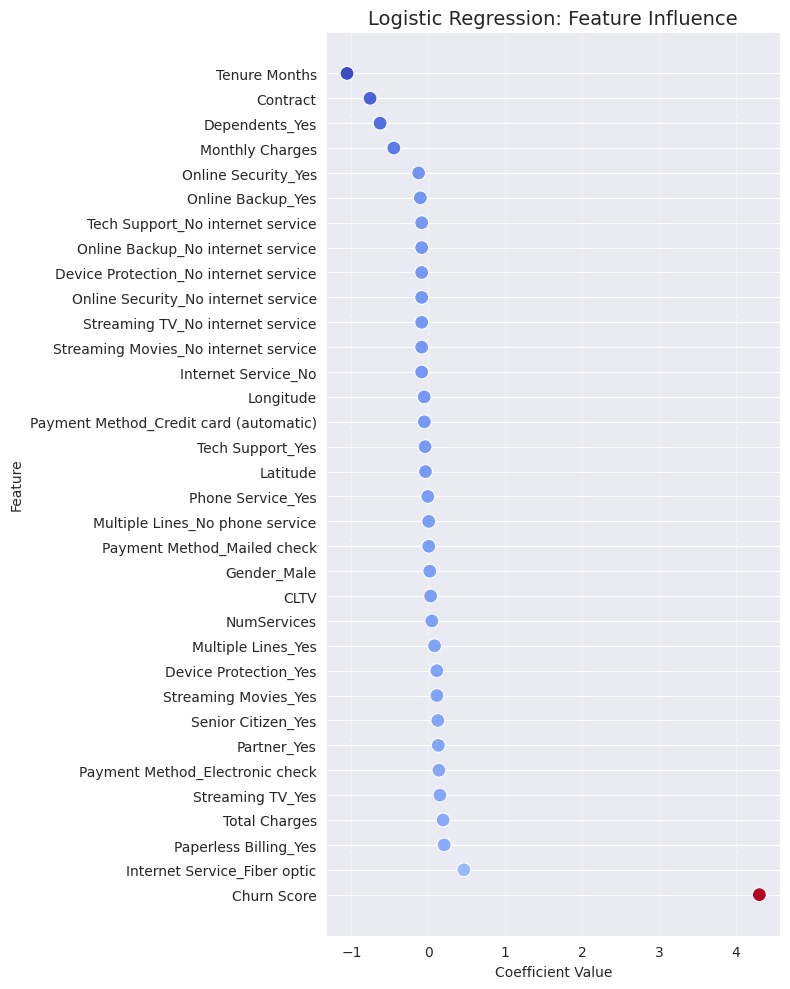

In [36]:
# Extract and organize Logistic Regression coefficients
lr_coefficients = pd.Series(logreg_model.coef_[0], index=X_train_df.columns)
lr_coef_df = pd.DataFrame({
    'Feature': lr_coefficients.index,
    'Coefficient': lr_coefficients.values
}).sort_values(by='Coefficient', ascending=True)

# Plot using horizontal dot plot with diverging color palette
plt.figure(figsize=(8, 10))
sns.scatterplot(
    x='Coefficient',
    y='Feature',
    data=lr_coef_df,
    hue='Coefficient',
    palette='coolwarm',
    legend=False,
    s=100
)

plt.title("Logistic Regression: Feature Influence", fontsize=14)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### XGBoost Model Fine Tuning

To improve model performance, a grid search was conducted using 5-fold cross-validation. The tuning process focused on adjusting n_estimators, learning_rate, and max_depth to maximize the ROC AUC score. This approach helped identify the most effective combination of hyperparameters for boosting predictive accuracy.


In [40]:
# Initialize model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Define grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=0,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Optimal Hyperparameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

Optimal Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
Best ROC AUC Score: 0.9844316281613364


In [41]:
# Final model using best parameters
xgb_best = xgb.XGBClassifier(
    **grid_search.best_params_,
    use_label_encoder=False,
    eval_metric="auc"
)
xgb_best.fit(X_train, y_train)

# Predictions and evaluation
y_pred = xgb_best.predict(X_test)
y_proba = xgb_best.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1036
           1       0.84      0.87      0.85       373

    accuracy                           0.92      1409
   macro avg       0.90      0.90      0.90      1409
weighted avg       0.92      0.92      0.92      1409

ROC AUC Score: 0.9798


## Discussion / Conclusion

This notebook covered the full modeling pipeline, from exploratory data analysis and feature engineering to model evaluation and hyperparameter tuning. Several key insights emerged:

- The inclusion of Churn Score significantly improved performance, showing a 68% correlation with churn. Derived features can be valuable when their construction is transparent and collinearity is assessed.
- The Churn Reason field, while useful for exploratory analysis, directly reveals the outcome and must be excluded from predictive modeling to maintain integrity.

The final XGBoost model achieved strong classification metrics, including a ROC AUC of 0.9798. Although the churn rate (~25%) doesn't necessitate aggressive resampling, techniques like SMOTE may offer incremental gains worth testing.
